In [6]:
import pandas as pd

df = pd.read_csv('markets_with_returns.csv')
market_return_columns = [
    'Nifty_Return', 'DowJones_Return', 'Nasdaq_Return',
    'HangSeng_Return', 'Nikkei_Return' ]



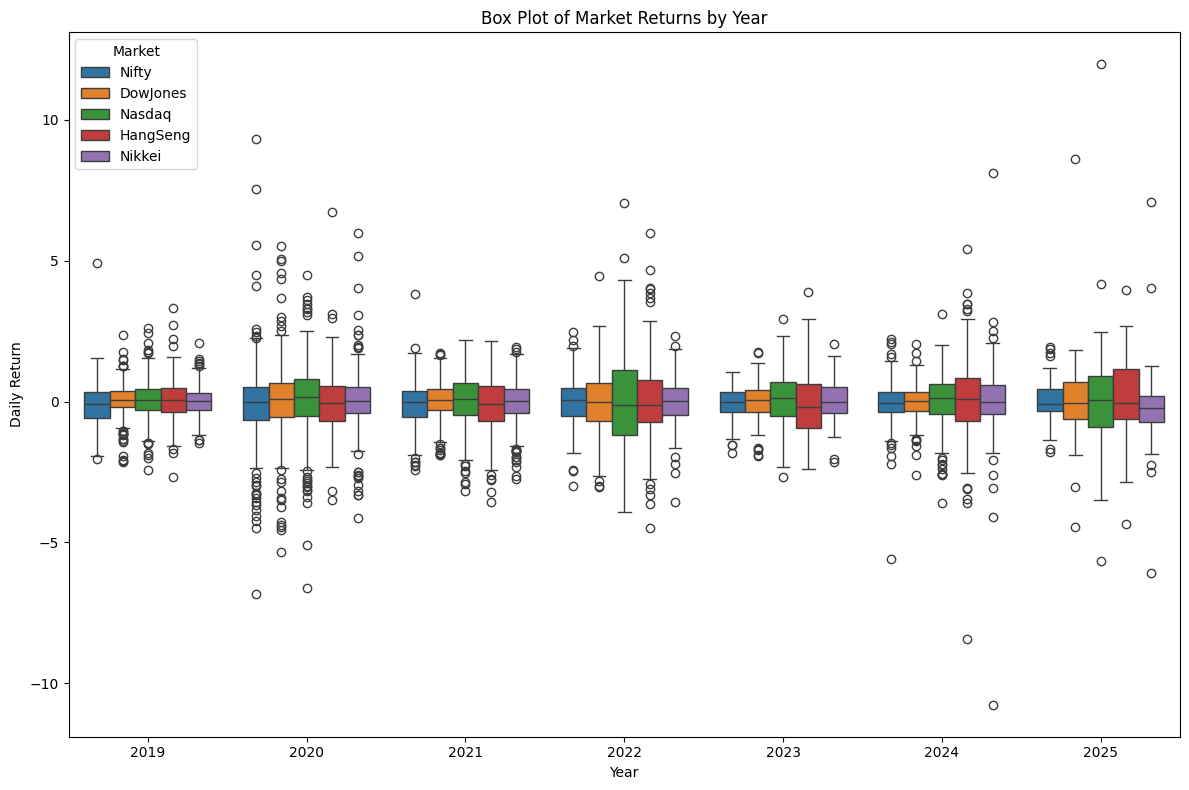

In [7]:
# Box plot of all markets per year, with market names only (no '_Return')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for boxplot: melt the dataframe
melted = df.melt(id_vars=['Year'], value_vars=market_return_columns,
                  var_name='Market', value_name='Return')
melted['Market'] = melted['Market'].apply(lambda x: x.split('_')[0])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Return', hue='Market', data=melted)
plt.title('Box Plot of Market Returns by Year')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend(title='Market')
plt.tight_layout()
plt.show()

In [12]:
# Table of daily returns by YEAR (n, mean, std. deviation), grouped by year, market names cleaned
melted = df.melt(id_vars=['Year'], value_vars=market_return_columns,
                  var_name='Market', value_name='Return')
melted['Market'] = melted['Market'].apply(lambda x: x.split('_')[0])

# Display daily returns statistics as one table per year, markets as columns, stats as rows
years = sorted(melted['Year'].unique())
for year in years:
    stats_year = returns_stats[returns_stats['Year'] == year].set_index('Market')[['n', 'Mean', 'StdDev']].T
    print(f"\nDaily Returns Statistics for Year {year}:")
    display(stats_year)



Daily Returns Statistics for Year 2019:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,260.000000,260.000000,260.000000,260.000000,260.000000
Mean,0.051587,0.051032,0.068662,-0.104083,0.025458
StdDev,0.598383,0.730388,0.719940,0.758882,0.515043



Daily Returns Statistics for Year 2020:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,261.000000,261.000000,261.000000,261.000000,261.000000
Mean,-0.008516,-0.089260,0.069965,-0.116355,0.024022
StdDev,1.443999,1.039301,1.385392,1.549898,1.136608



Daily Returns Statistics for Year 2021:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,260.000000,260.000000,260.000000,260.000000,260.000000
Mean,0.047866,-0.128642,0.009104,-0.100697,-0.042669
StdDev,0.689939,0.998099,0.907126,0.815228,0.796146



Daily Returns Statistics for Year 2022:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,260.000000,260.000000,260.000000,260.000000,260.000000
Mean,-0.023145,0.030943,-0.062327,-0.003772,-0.009099
StdDev,1.081564,1.379589,1.678026,0.814409,0.798300



Daily Returns Statistics for Year 2023:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,260.000000,260.000000,260.000000,260.000000,260.000000
Mean,0.035691,-0.110429,0.104487,-0.047863,0.042189
StdDev,0.632733,1.064514,0.929906,0.506963,0.662319



Daily Returns Statistics for Year 2024:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,261.000000,261.000000,261.000000,261.000000,261.000000
Mean,0.007598,0.101235,0.006932,-0.061273,0.033838
StdDev,0.594723,1.342462,0.887691,0.748924,1.230001



Daily Returns Statistics for Year 2025:


Market,DowJones,HangSeng,Nasdaq,Nifty,Nikkei
n,85.000000,85.000000,85.000000,85.000000,85.000000
Mean,0.001631,0.115661,0.057386,0.022194,-0.216851
StdDev,1.405471,1.266878,1.962584,0.719476,1.344161


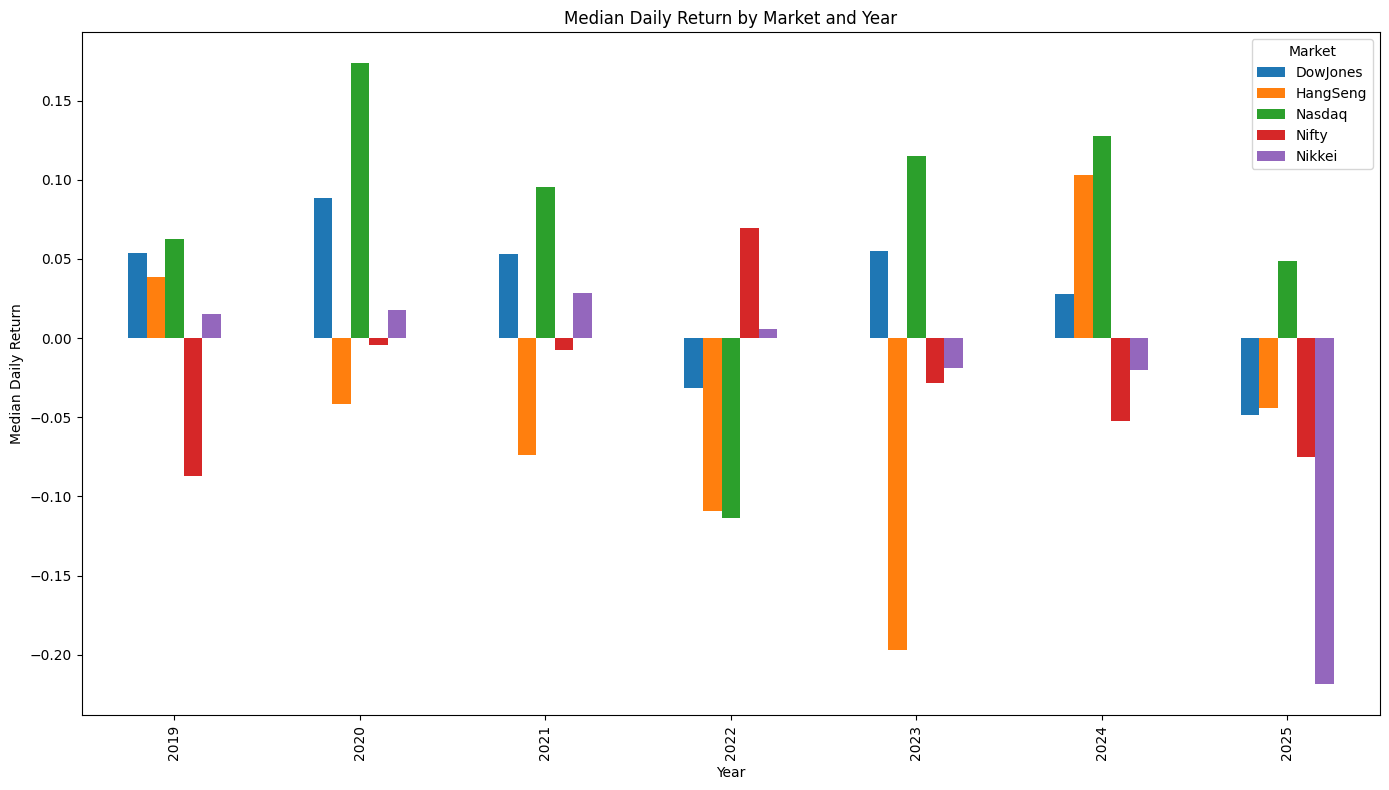

In [13]:
# Bar Plot of median daily return for all markets per year
median_returns = melted.groupby(['Year', 'Market'])['Return'].median().reset_index()
pivot_median = median_returns.pivot(index='Year', columns='Market', values='Return')

pivot_median.plot(kind='bar', figsize=(14, 8))
plt.title('Median Daily Return by Market and Year')
plt.xlabel('Year')
plt.ylabel('Median Daily Return')
plt.legend(title='Market')
plt.tight_layout()
plt.show()

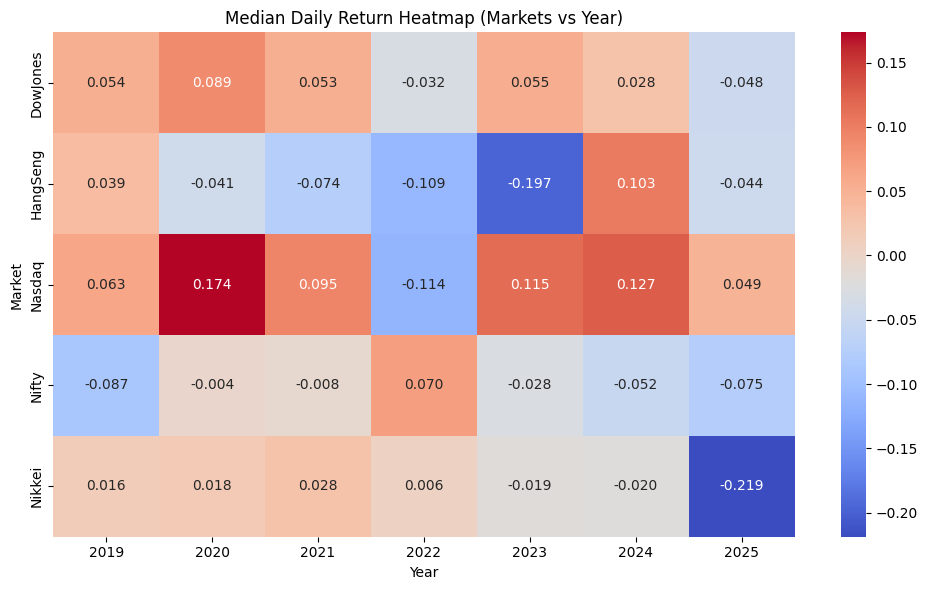

In [16]:
# Heatmap of median returns for all markets per year
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_median.T, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Median Daily Return Heatmap (Markets vs Year)')
plt.xlabel('Year')
plt.ylabel('Market')
plt.tight_layout()
plt.show()

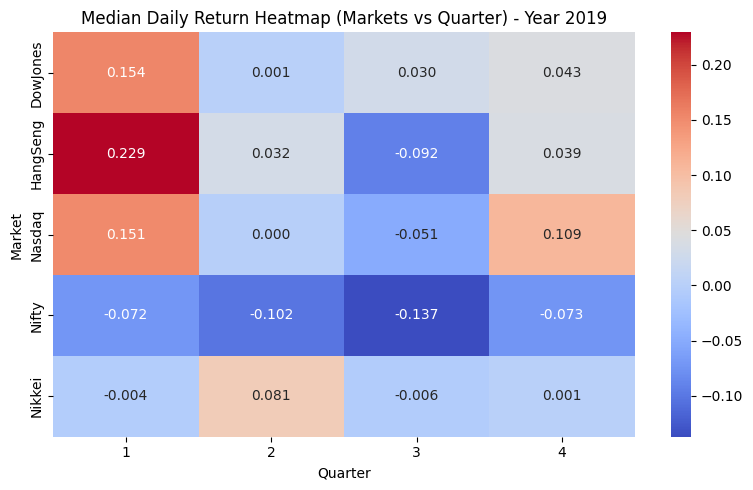

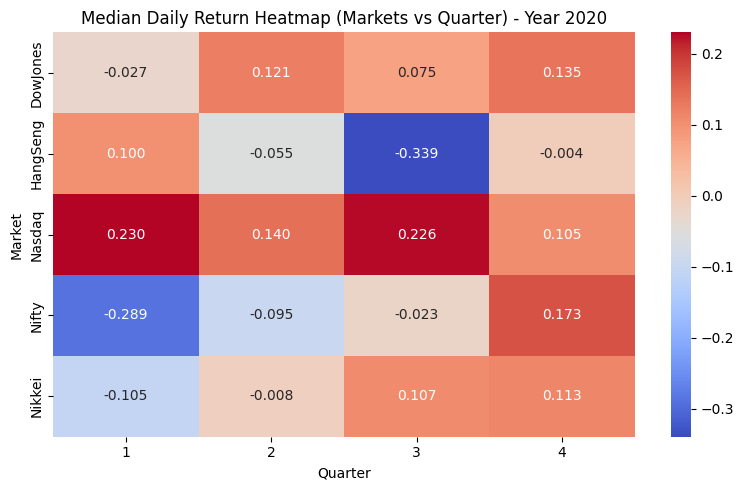

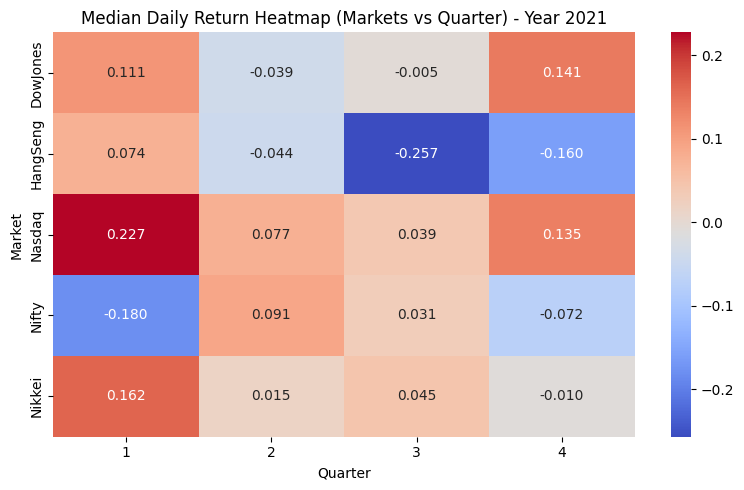

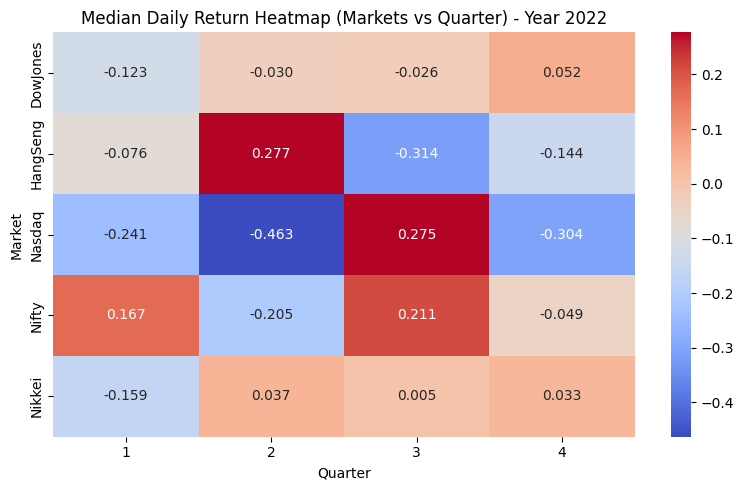

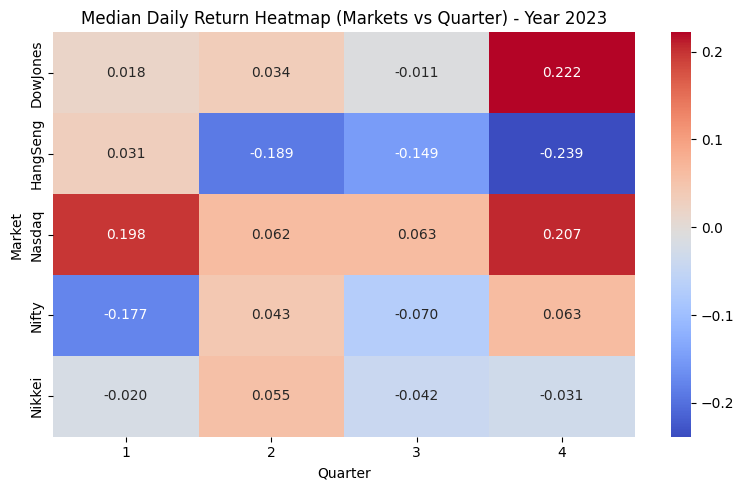

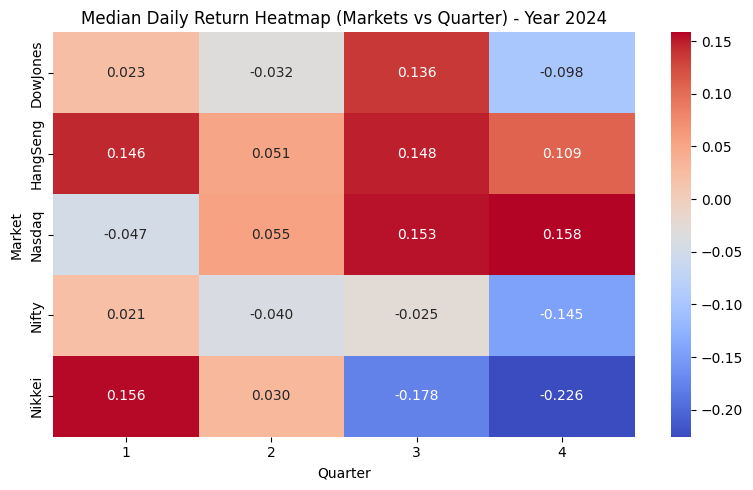

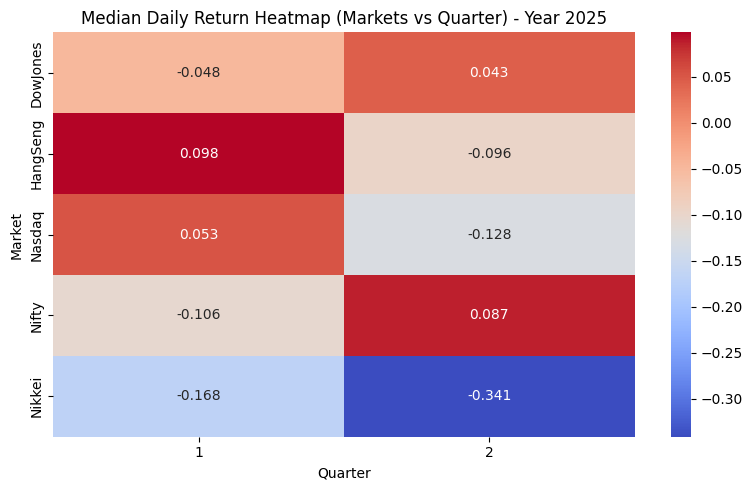

In [18]:
# Heatmap of median returns for all markets per quarter, one plot per year
melted_quarter = df.melt(id_vars=['Year', 'Quarter'], value_vars=market_return_columns,
                        var_name='Market', value_name='Return')
melted_quarter['Market'] = melted_quarter['Market'].apply(lambda x: x.split('_')[0])

for year in years:
    median_quarter = melted_quarter[melted_quarter['Year'] == year].groupby(['Quarter', 'Market'])['Return'].median().reset_index()
    pivot_quarter = median_quarter.pivot(index='Market', columns='Quarter', values='Return')
    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_quarter, annot=True, fmt=".3f", cmap='coolwarm')
    plt.title(f'Median Daily Return Heatmap (Markets vs Quarter) - Year {year}')
    plt.xlabel('Quarter')
    plt.ylabel('Market')
    plt.tight_layout()
    plt.show()

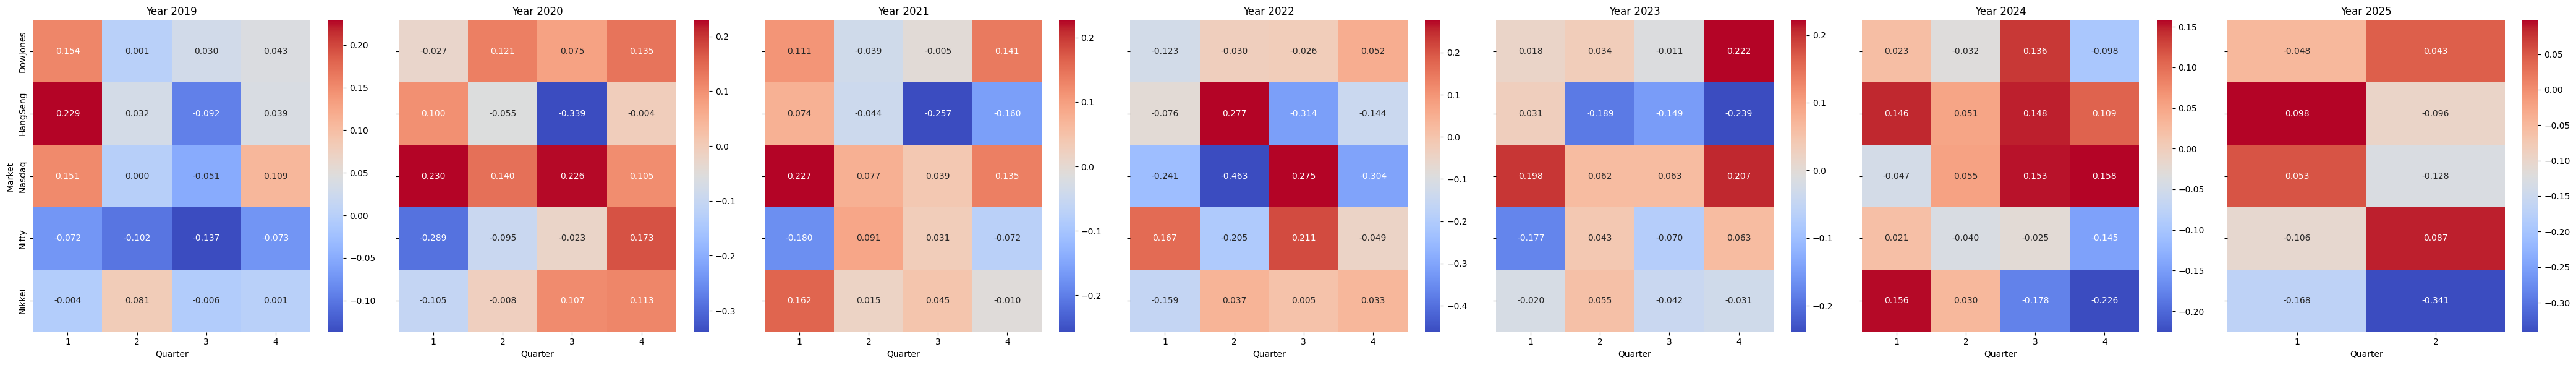

In [19]:
# Combined heatmaps of median returns for all markets per quarter, all years in one plot
n_years = len(years)
fig, axes = plt.subplots(1, n_years, figsize=(6*n_years, 6), sharey=True)
for i, year in enumerate(years):
    median_quarter = melted_quarter[melted_quarter['Year'] == year].groupby(['Quarter', 'Market'])['Return'].median().reset_index()
    pivot_quarter = median_quarter.pivot(index='Market', columns='Quarter', values='Return')
    sns.heatmap(pivot_quarter, annot=True, fmt=".3f", cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Quarter')
    if i == 0:
        axes[i].set_ylabel('Market')
    else:
        axes[i].set_ylabel('')
plt.tight_layout()
plt.show()